In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

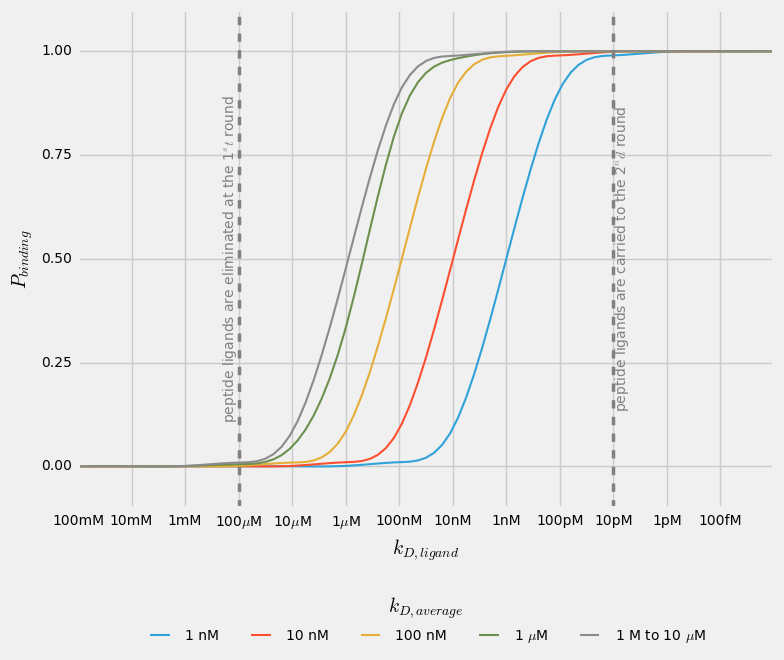

In [18]:
TotalProteinConcentration = 0.000001
TotalLigandConcentration = 0.000001


# Create a figure of size 8x6 inches, 500 dots per inch
plt.figure(figsize = (8, 6),
           dpi = 500)
# Create 'ggplot' style
plt.style.use('fivethirtyeight')

# Create a new subplot from a grid of 1x1
Graph = plt.subplot(1, 1, 1)


for i in range(-9, -4):
    AverageLigandKD = 10**i
    ProteinBoundProbability = (TotalLigandConcentration/AverageLigandKD)/(1 + (TotalLigandConcentration/AverageLigandKD))
    ExpectedFreeProteinConcentration = TotalProteinConcentration*(1 - ProteinBoundProbability)
    Xs = []
    Ys = []    
    for j in range (-15, 1):
        LigandKD = 10**j
        LigandBoundProbability = (ExpectedFreeProteinConcentration/LigandKD)/(1 + (ExpectedFreeProteinConcentration/LigandKD))
        Xs += [-j]
        Ys += [LigandBoundProbability]
        
    XsReversed = list(reversed(Xs))
    YsReversed = list(reversed(Ys))
        
    Interpolation = interpolate.splrep(XsReversed, YsReversed, s = 0, k = 3)
    XsNew = np.linspace(0, 15, num = 101, endpoint = True)
    YsNew = interpolate.splev(XsNew, Interpolation, der = 0)
    
        
    plt.plot(XsNew, YsNew,
             ls = '-',
             #mew = 0.1,
             #ms = 4.0,
             lw = 1.5,
             mec = '#191919')

    
plt.plot([4, 4], [-0.1, 1.1],
     color = 'gray',
     linewidth = 2.5,
     linestyle = "--")

plt.plot([11, 11], [-0.1, 1.1],
     color = 'gray',
     linewidth = 2.5,
     linestyle = "--")

# Set x limits
plt.xlim(1.0, 14.0)
# Set x ticks
plt.xticks(np.linspace(1, 13, 13, endpoint = True),
           ['100mM', '10mM', '1mM', '100$\mu$M', '10$\mu$M', '1$\mu$M', '100nM', '10nM', '1nM', '100pM', '10pM', '1pM', '100fM'],
           fontsize = 10)

# Set y limits
plt.ylim(-0.1, 1.1)
# Set y ticks
plt.yticks(np.linspace(-0, 1, 5, endpoint = True),
          fontsize = 10)
    
XLabel = '$k_{D,ligand}$' #$_$ makes subscript possible
plt.xlabel(XLabel,
           fontsize = 14)
YLabel = '$P_{binding}$'
plt.ylabel(YLabel,
           fontsize = 14)

plt.text(4, 0.5,
         'peptide ligands are eliminated at the 1$^st$ round',
         horizontalalignment = 'right',
         verticalalignment = 'center',
         rotation = 'vertical',
         color = "gray",
         #alpha = alpha,
         fontsize = 10,
         clip_on = True)

plt.text(11, 0.5,
         'peptide ligands are carried to the 2$^nd$ round',
         horizontalalignment = 'left',
         verticalalignment = 'center',
         rotation = 'vertical',
         color = "gray",
         #alpha = alpha,
         fontsize = 10,
         clip_on = True)

LegendEntries = ['1 nM', '10 nM', '100 nM', '1 $\mu$M', '1 M to 10 $\mu$M']
LegendTitle = '$k_{D,average}$'

Legend = plt.legend(LegendEntries,
                    title = LegendTitle,
                    fontsize = 10,
                    loc = 'upper center',
                    bbox_to_anchor = (0.5, -0.15),
                    fancybox = True,
                    shadow = False,
                    ncol = 5)
#plt.setp(legend.get_title(),fontsize = 'xx-small')
Graph.get_legend().get_title().set_size('medium')

FileNamePNG = '20Sept2016test02.png'

plt.savefig(FileNamePNG,
            bbox_inches = 'tight',
            dpi = 300)
plt.show()
plt.close()
    